# **Linear Regression Model**

This is a implementation of linear regression model which is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.


*  **Goals**

    The goal of this project is to create an ML model that can predict house prices based on the number of bedrooms in the house.

*  **Data Condition**

  - Using dummy data which is `bedrooms` and `house_price`
  - Single feature

## Prepare Tools and Materials

In [1]:
# Library
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
#number of bedrooms data
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#house price data, assumptions in dollars
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

print(bedrooms, house_price)

[1 1 2 2 3 4 4 5 5 5] [15000 18000 27000 34000 50000 68000 65000 81000 85000 90000]


In [3]:
# Set data length
m = len(bedrooms)
m

10

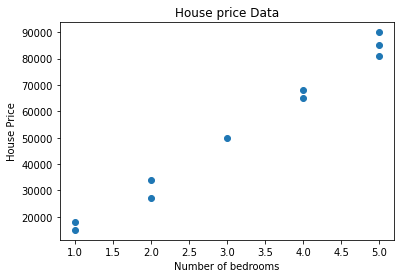

In [4]:
#@title Visualize data of `bedrooms` and `house_price`

plt.scatter(bedrooms,house_price)
plt.title('House price Data')
plt.xlabel('Number of bedrooms')
plt.ylabel('House Price')
plt.show()

## Math Equation

- ### **Linear Regression**
In linear regression, the method is to ultilize data input to fit the parameters $w$,$b$ by minimizing a measure of the error between model predictions and the actual data. The measure is called the $cost$.
In Linear Regression, the cost function is :
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{1}$$  where,$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

- ### **Gradient Descent**
To find the best $w$,$b$ value to minimize the $cost$ is by using *Gradient Descent* to find local minimum. It is defined as: 

  **Repeat the following steps until convergence:**

\begin{align}
 w &= w -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{3}\\
b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)} \tag{4}\
\end{align}


parameters $w$, $b$ are updated simultaneously. Means that you calculate the derivatives for all the parameters before updating $w$,$b$.

## Math Implementation in Python
In this code, the implementation will be in 2 different functions :
- `cost_function` implementing equation (1) and (2) to calculate cost
- `gradient_descent` implementing equation (3) and (4) to update $w$,$b$ value

In [5]:
def cost_function (x,y,w,b,m):
  sum_cost = 0
  for i in range(m):
    j_wb = ((w * x[i])+b - y[i])**2
    sum_cost = sum_cost + (1/(2*m)  * j_wb)

  return sum_cost

In [6]:
def gradient_descent (x, y, w, b, alpha, m):
    for j in range(m):
        dw = (((w * (x[j])) + b - y[j]) * x[j])/m
        db = ((w * (x[j])) + b - y[j])/m
        w = w - (alpha * dw)
        b = b - (alpha * db)
    return w, b

## Compute All!

Here is a brief explanation the logic of code below that ultilize both fuctions to find best $w$, and $b$ value to produce the lowest $cost$:
- `w`, and `b` value will start as 0
- $alpha$ or *learning rate* will be set at 0.001
- the program will iterate for 30,000 times
- the program will save it's current $cost$, $w$, and $b$ to `final_cost`,`final_w`, and `final_b` but keep changing it if there is lower cost
- Finally, the program will print out the lowest $cost$ after iterate for 30,000 times and print out it's $w$, and $b$ value for corresponding $cost$



In [7]:
cost_list,w_list,b_list=[],[],[]
w=0
b=0
alpha = 0.001
final_w = final_b= 0

final_cost = cost_function (bedrooms,house_price,0,0,m)

for i in range (30000):
  cost = 0

  # list for graph
  w_list.append(w)

  # calculate cost
  cost = cost_function(bedrooms,house_price,w,b,m)
  cost_list.append(cost)

  # save W dand B for lowest cost function
  if cost < final_cost:
    final_w = w
    final_b = b

  w, b = gradient_descent (bedrooms, house_price, w, b, alpha, m)
  final_cost = cost_function (bedrooms,house_price,final_w,final_b,m)

print(f'Lowest cost\t: {final_cost}\nW Value\t\t: {np.round(final_w)}\nB Value\t\t: {np.round(final_b)}')

Lowest cost	: 4424666.360801171
W Value		: 17426.0
B Value		: -2454.0


<function matplotlib.pyplot.show(*args, **kw)>

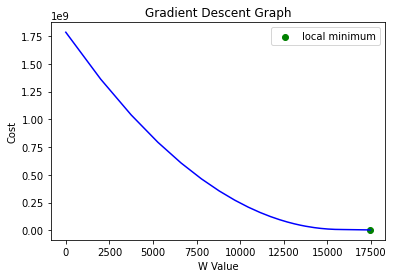

In [8]:
plt.title('Gradient Descent Graph')
plt.plot(w_list,cost_list, c='b')
plt.scatter(final_w,final_cost, label = 'local minimum', c='g')
plt.xlabel('W Value')
plt.ylabel('Cost')
plt.legend()
plt.show

>You see from graph above that $w$ value is already in local minimum of the graph, by that means $w$ value is in the perfect spot to make a lowest $cost$

## Visualize the model prediction towards the actual data
Visualizing the model prediction by calculate house price prediction using actual data and $w$, and $b$ values. The prediction will be notated as $\hat{y}$. It is calculated as follows:
$$\hat{y} = wx^{(i)} + b \tag{5}$$

`final_model` function will apply the formula above(5)

In [9]:
def final_model (m,w,b,x):
  y_hat = np.zeros(m)
  for i in range(m):
    y_hat[i] = (w * x[i])+b
    
  return y_hat

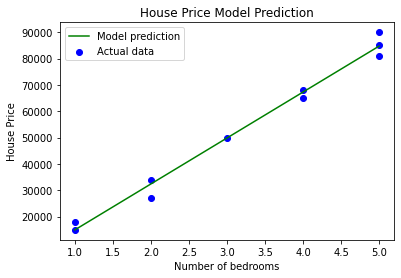

In [10]:
y_hat = final_model(m, final_w, final_b, bedrooms)

plt.scatter(bedrooms,house_price, label = 'Actual data', c='b')
plt.plot(bedrooms, y_hat, label='Model prediction', c='g')
plt.title('House Price Model Prediction')
plt.xlabel('Number of bedrooms')
plt.ylabel('House Price')
plt.legend()
plt.show()

## Model Accuracy

To check the accuracy of model prediction, this project will use R-Squared formula. The R-Squared value ranges from 0 to 1. Value of 1 indicates that the model perfectly fits the data, while a value of 0 indicates that the model has no explanatory power. It is calculated as follows:
$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}i)^2}{\sum{i=1}^{n} (y_i - \bar{y})^2} \tag{6}$$

Where $y_i$ is the actual value for the $i^{th}$ observation, $\hat{y}_i$ is the predicted value for the $i^{th}$ observation, and $\bar{y}$ is the mean of the actual values. 

In [11]:
r2 = 0
y_means = np.mean(house_price)

for i in range (m):
  diff_1 = (house_price[i] - y_hat[i])**2
  diff_2 = (house_price[i] - y_means)**2
  r2 += 1 - (diff_1/diff_2)

result = r2 / m 
print(f'R-Squared value is: {np.round(result,5)}')
print(f'So the accuracy is: {np.round(result * 100,2)}%')

R-Squared value is: 0.98624
So the accuracy is: 98.62%


>The accuracy is pretty high, which is near 100%

## Finalize the Model
After value of $w$, and $b$ is found, and the accuracy is good, the machine learning model is ready. The formula to apply predefined value of $w$,and $b$ is:
$$\hat{y} = wx + b \tag{7}$$


where the $\hat{y}$ is a prediction of x given, or in this model is the number of bedrooms.

`model_predict` will be the function to use the model based on equation(6)

In [12]:
def model_predict(w,b,x):
  price = (w*x)+b
  price = np.round(price,3)
  return price

In [14]:
#@title Test the model

print(f'For 3 bedrooms, the house price prediction is: {model_predict(final_w, final_b, 3)}$ ')
print(f'For 7 bedrooms, the house price prediction is: {model_predict(final_w, final_b, 7)}$ ')
print(f'For 6 bedrooms, the house price prediction is: {model_predict(final_w, final_b, 6)}$ ')

For 3 bedrooms, the house price prediction is: 49824.474$ 
For 7 bedrooms, the house price prediction is: 119529.148$ 
For 6 bedrooms, the house price prediction is: 102102.98$ 
